In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
# juxtapose fivemers.csv, 8a-mut-freq.csv, and 9a-mut-freq.csv
fivemers = pd.read_csv('fivemers.csv')
fivemers.columns = ['Fivemer']
mut8a = pd.read_csv('8a-mut-freq.csv')
mut9a = pd.read_csv('9a-mut-freq.csv')
df = pd.concat([fivemers, mut8a, mut9a], axis=1)

mutability = pd.read_csv('../nextflow/data/mutability/MK_RS5NF_mutability.csv', sep=' ')

df = df.merge(mutability, on='Fivemer')

df


,Fivemer,8a-mut-freq,9a-mut-freq,Mutability
0,NNGAC,0.000136,0.000469,0.000367
1,NGACA,0.000813,0.002737,0.000321
2,GACAT,0.001084,0.003128,0.000384
3,ACATT,0.006233,0.003518,0.000493
4,CATTG,0.010569,0.011311,0.000496
...,...,...,...,...
317,ATAAA,0.038211,0.028460,0.000867
318,TAAAA,0.011111,0.009278,0.001240
319,AAAAC,0.120596,0.134562,0.000865
320,AAACN,0.023848,0.022727,0.000656


In [3]:
import re

def represent_degenerate_motif(degenerate_motif):
    # Map of degenerate nucleotide symbols to their corresponding regular expression
    degenerate_nucleotide_map = {
        'W': '[AT]',
        'R': '[AG]',
        'Y': '[CT]',
        'C': 'C',
        'N': '[ACGT]',
        'S': '[CG]',
        'M': '[AC]',
        'K': '[GT]',
        'G': 'G',
        'A': 'A',
        'T': 'T',
    }

    # Convert degenerate motif to regex pattern
    regex_pattern = ''.join([degenerate_nucleotide_map[base] for base in degenerate_motif])
    return regex_pattern

def matches_RGYW(kmer):
    if len(kmer) != 5:
        return False

    # Define the motifs using degenerate base notation
    motif_WRCYN = 'WRCYN'
    motif_NRGYW = 'NRGYW'

    # Represent these motifs as regex patterns
    regex_WRCYN = represent_degenerate_motif(motif_WRCYN)
    regex_NRGYW = represent_degenerate_motif(motif_NRGYW)

    # Check if the kmer matches either of the motifs
    return bool(re.match(regex_WRCYN, kmer)) or bool(re.match(regex_NRGYW, kmer))

# Example usage
kmer = "AAGCT"
print(matches_RGYW(kmer))  # This will return True or False based on the match


True


<Axes: xlabel='8a-mut-freq', ylabel='9a-mut-freq'>

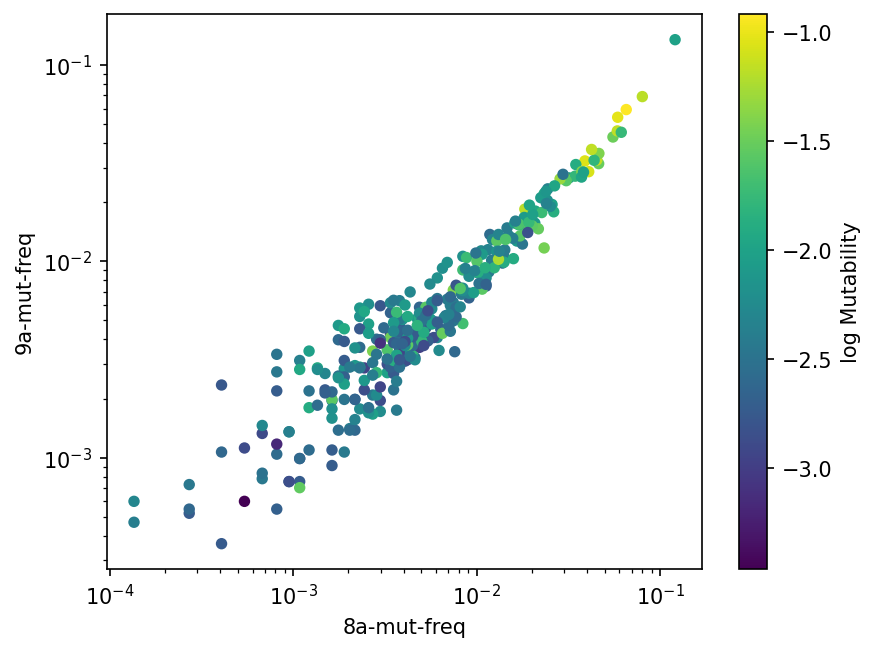

In [23]:
# make a scatter of 8a-mut-freq vs 9a-mut-freq in df
# df.plot.scatter(x='8a-mut-freq', y='9a-mut-freq', c='Mutability', colormap='viridis')

# same plot but log log

# same plot but log cmap
import numpy as np
# define log Mutability
df['log Mutability'] = np.log10(df['Mutability'])

df.plot.scatter(x='8a-mut-freq', y='9a-mut-freq', c='log Mutability', colormap='viridis', loglog=True)


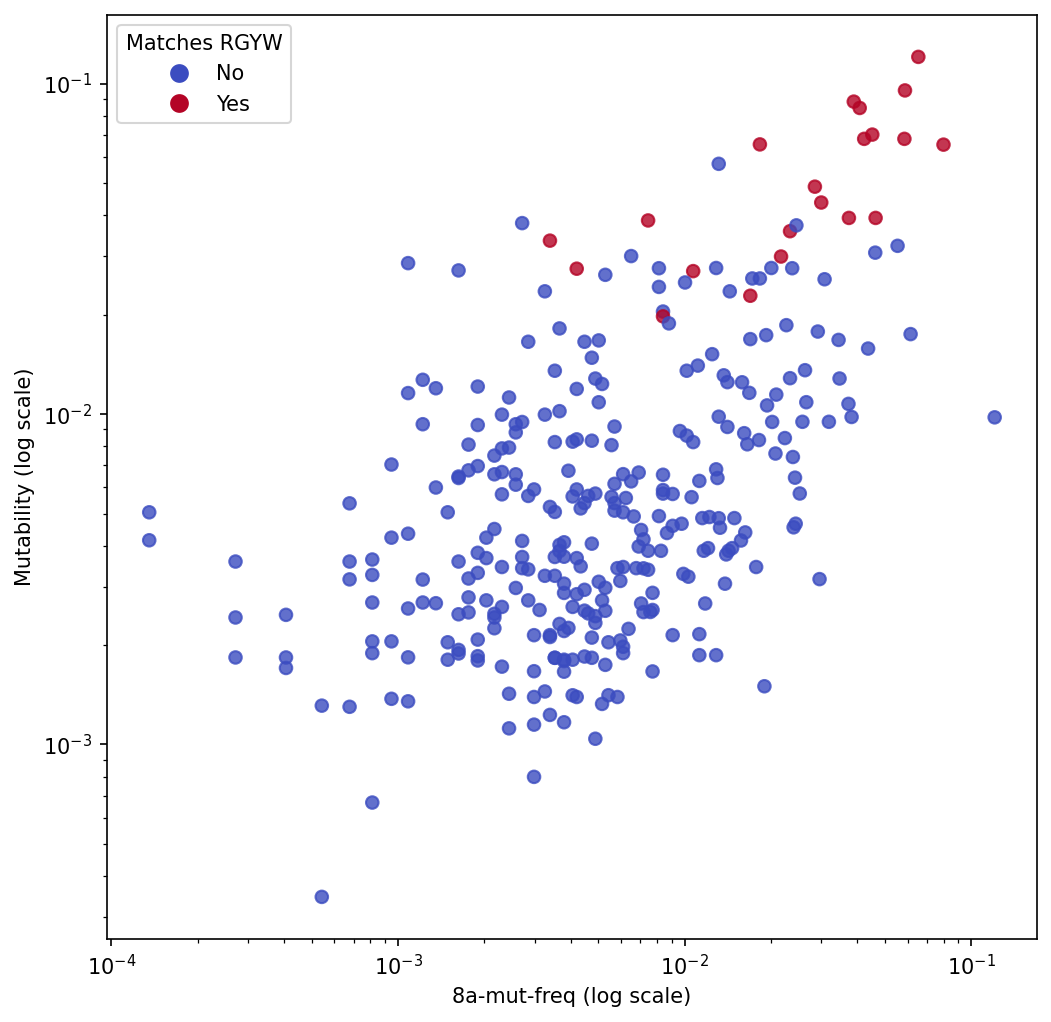

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'Fivemer', '8a-mut-freq', 'Mutability'

# Apply the matches_RGYW function to the 'Fivemer' column
df['matches_RGYW'] = df['Fivemer'].apply(matches_RGYW)

# Create a scatter plot
plt.figure(figsize=(8, 8))  # Square aspect ratio
scatter = plt.scatter(df['8a-mut-freq'], df['Mutability'], c=df['matches_RGYW'], cmap='coolwarm', alpha=0.8)

# Set x and y axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

plt.xlabel('8a-mut-freq (log scale)')
plt.ylabel('Mutability (log scale)')

# Create a custom legend
legend_labels = ['No', 'Yes']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], 
                      markersize=10, markerfacecolor=scatter.cmap(scatter.norm(i))) for i in range(2)]
plt.legend(handles, legend_labels, title="Matches RGYW")

plt.show()
